## ノック51: 物流に関するデータを読み込む

In [14]:
import pandas as pd
factories = pd.read_csv("tbl_factory.csv", index_col=0)
factories.head()

,FCName,FCDemand,FCRegion
FCID,,,
FC00001,東京工場,28,関東
FC00002,木更津工場,29,関東
FC00003,多摩工場,31,関東
FC00004,横須賀工場,25,関東
FC00005,仙台工場,21,東北


In [15]:
warehouses = pd.read_csv("tbl_warehouse.csv", index_col=0)
warehouses.head()

,WHName,WHSupply,WHRegion
WHID,,,
WH00001,杉並倉庫,35,関東
WH00002,品川倉庫,41,関東
WH00003,豊洲倉庫,42,関東
WH00004,郡山倉庫,60,東北
WH00005,仙台倉庫,72,東北


In [16]:
cost = pd.read_csv("rel_cost.csv", index_col=0)
cost.head()

,FCID,WHID,Cost
RCostID,,,
1,FC00001,WH00001,0.4
2,FC00001,WH00002,0.8
3,FC00001,WH00003,1.5
4,FC00002,WH00001,0.9
5,FC00002,WH00002,0.8


In [17]:
trans = pd.read_csv("tbl_transaction.csv", index_col=0)
trans.head()

,TransactionDate,ToFC,FromWH,Quantity
TRID,,,,
0,2019-01-01 02:11:10,FC00004,WH00003,33
1,2019-01-01 06:12:42,FC00007,WH00006,19
2,2019-01-01 06:32:32,FC00006,WH00004,31
3,2019-01-01 07:17:06,FC00002,WH00003,18
4,2019-01-01 07:52:18,FC00001,WH00002,30


In [18]:
# 読み込んだ輸送実績データをキーで統一
join_data = pd.merge(trans, cost, left_on=["ToFC","FromWH"], right_on=["FCID", "WHID"], how="left")
join_data.head()

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1
1,2019-01-01 06:12:42,FC00007,WH00006,19,FC00007,WH00006,1.3
2,2019-01-01 06:32:32,FC00006,WH00004,31,FC00006,WH00004,0.9
3,2019-01-01 07:17:06,FC00002,WH00003,18,FC00002,WH00003,1.6
4,2019-01-01 07:52:18,FC00001,WH00002,30,FC00001,WH00002,0.8


In [19]:
# 工場のデータも結合
join_data = pd.merge(join_data, factories, left_on="ToFC", right_on="FCID", how="left")
join_data.head()

,TransactionDate,ToFC,FromWH,Quantity,FCID,WHID,Cost,FCName,FCDemand,FCRegion
0,2019-01-01 02:11:10,FC00004,WH00003,33,FC00004,WH00003,1.1,横須賀工場,25,関東
1,2019-01-01 06:12:42,FC00007,WH00006,19,FC00007,WH00006,1.3,那須工場,25,東北
2,2019-01-01 06:32:32,FC00006,WH00004,31,FC00006,WH00004,0.9,山形工場,30,東北
3,2019-01-01 07:17:06,FC00002,WH00003,18,FC00002,WH00003,1.6,木更津工場,29,関東
4,2019-01-01 07:52:18,FC00001,WH00002,30,FC00001,WH00002,0.8,東京工場,28,関東


In [20]:
# 倉庫のデータも結合し、見やすいように列を並び替え
join_data = pd.merge(join_data, warehouses, left_on="FromWH", right_on="WHID", how="left")
join_data = join_data[["TransactionDate", "Quantity", "Cost", "ToFC", "FCName", "FCDemand", "FromWH", "WHName", "WHSupply", "WHRegion"]]
join_data.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,33,1.1,FC00004,横須賀工場,25,WH00003,豊洲倉庫,42,関東
1,2019-01-01 06:12:42,19,1.3,FC00007,那須工場,25,WH00006,山形倉庫,65,東北
2,2019-01-01 06:32:32,31,0.9,FC00006,山形工場,30,WH00004,郡山倉庫,60,東北
3,2019-01-01 07:17:06,18,1.6,FC00002,木更津工場,29,WH00003,豊洲倉庫,42,関東
4,2019-01-01 07:52:18,30,0.8,FC00001,東京工場,28,WH00002,品川倉庫,41,関東


In [21]:
# 関東支社と東北支社のデータを比較用に抽出
kanto = join_data.loc[join_data["WHRegion"]=="関東"]
kanto.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
0,2019-01-01 02:11:10,33,1.1,FC00004,横須賀工場,25,WH00003,豊洲倉庫,42,関東
3,2019-01-01 07:17:06,18,1.6,FC00002,木更津工場,29,WH00003,豊洲倉庫,42,関東
4,2019-01-01 07:52:18,30,0.8,FC00001,東京工場,28,WH00002,品川倉庫,41,関東
7,2019-01-01 09:09:30,12,1.5,FC00001,東京工場,28,WH00003,豊洲倉庫,42,関東
8,2019-01-01 10:52:55,27,1.5,FC00003,多摩工場,31,WH00003,豊洲倉庫,42,関東


In [22]:
tohoku = join_data.loc[join_data["WHRegion"]=="東北"]
tohoku.head()

,TransactionDate,Quantity,Cost,ToFC,FCName,FCDemand,FromWH,WHName,WHSupply,WHRegion
1,2019-01-01 06:12:42,19,1.3,FC00007,那須工場,25,WH00006,山形倉庫,65,東北
2,2019-01-01 06:32:32,31,0.9,FC00006,山形工場,30,WH00004,郡山倉庫,60,東北
5,2019-01-01 08:56:09,31,0.3,FC00005,仙台工場,21,WH00005,仙台倉庫,72,東北
6,2019-01-01 09:00:15,33,0.7,FC00006,山形工場,30,WH00006,山形倉庫,65,東北
9,2019-01-01 14:12:51,21,0.7,FC00006,山形工場,30,WH00006,山形倉庫,65,東北


## ノック52: 現状の輸送量、コストを確認

In [23]:
# 1年間に輸送した部品数やそれに掛かったコストを集計する
print("関東支社の総コスト: " + str(kanto["Cost"].sum()) + "万円")
print("東北支社の総コスト: " + str(tohoku["Cost"].sum()) + "万円")

print("関東支社の総部品輸送個数: " + str(kanto["Quantity"].sum()) + "個")
print("東北支社の総部品輸送個数: " + str(tohoku["Quantity"].sum()) + "個")

関東支社の総コスト: 2189.3万円
東北支社の総コスト: 2062.0万円
関東支社の総部品輸送個数: 49146個
東北支社の総部品輸送個数: 50214個


In [24]:
# 部品1つあたりの輸送コストを算出
tmp = (kanto["Cost"].sum() / kanto["Quantity"].sum() * 10000)
print("関東支社の部品1つ当たりの輸送コスト: " + str(int(tmp)) + "円")
tmp = (tohoku["Cost"].sum() / tohoku["Quantity"].sum() * 10000)
print("東北支社の部品1つ当たりの輸送コスト: " + str(int(tmp)) + "円")

関東支社の部品1つ当たりの輸送コスト: 445円
東北支社の部品1つ当たりの輸送コスト: 410円


In [25]:
# 各支社の輸送コストの平均を算出
cost_chk = pd.merge(cost, factories, on="FCID", how="left")
print("関東支社の平均輸送コスト: " + str(cost_chk["Cost"].loc[cost_chk["FCRegion"]=="関東"].mean()) + "万円")
print("東北支社の平均輸送コスト: " + str(cost_chk["Cost"].loc[cost_chk["FCRegion"]=="東北"].mean()) + "万円")

関東支社の平均輸送コスト: 1.075万円
東北支社の平均輸送コスト: 1.05万円


## ノック53: ネットワークの可視化

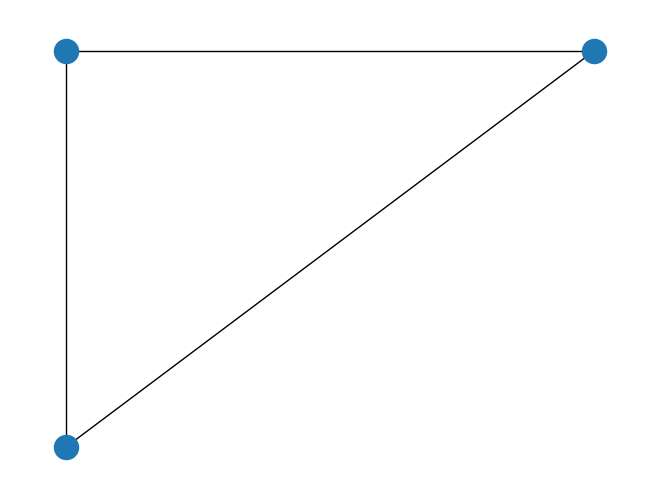

In [26]:
# NetworkXライブラリを用いて可視化(サンプル)
import networkx as nx
import matplotlib.pyplot as plt

# グラフオブジェクトの作成
G = nx.Graph()

# 頂点の設定
G.add_node("nodeA")
G.add_node("nodeB")
G.add_node("nodeC")

# 辺の設定
G.add_edge("nodeA", "nodeB")
G.add_edge("nodeA", "nodeC")
G.add_edge("nodeB", "nodeC")

# 座標の設定
pos = {}
pos["nodeA"] = (0,0)
pos["nodeB"] = (1,1)
pos["nodeC"] = (0,1)

# 描画
nx.draw(G, pos)

# 表示
plt.show()

## ノック54: ネットワークにノードを追加

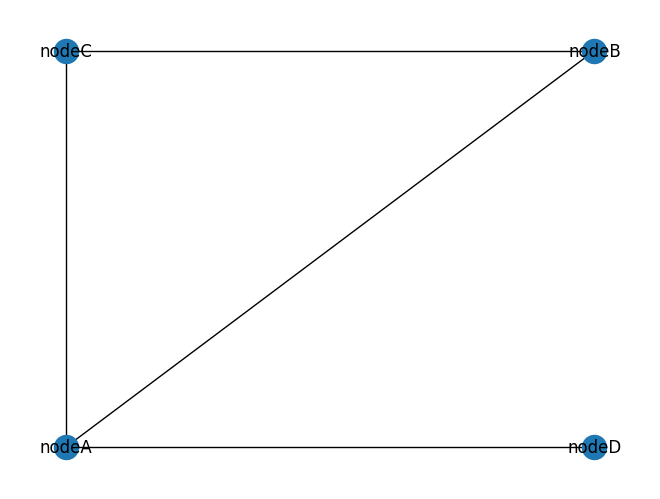

In [27]:
# サンプルの続き
G.add_node("nodeD")
G.add_edge("nodeA","nodeD")
pos["nodeD"] = (1,0)
nx.draw(G, pos, with_labels=True)

## ノック55: ルートの重み付けを実施

          A         B         C         D         E
0  0.639921  0.143353  0.944669  0.521848  0.000000
1  0.264556  0.000000  0.456150  0.568434  0.000000
2  0.617635  0.612096  0.616934  0.943748  0.000000
3  0.000000  0.000000  0.697631  0.060225  0.666767
4  0.670638  0.210383  0.000000  0.315428  0.000000
   A  B  C  D  E
0  0  0  2  2  1
1  0  2  0  2  1
[6.39921, 1.4335300000000002, 9.44669, 5.21848, 0.0, 2.64556, 0.0, 4.5615, 5.68434, 0.0, 6.17635, 6.12096, 6.16934, 9.43748, 0.0, 0.0, 0.0, 6.97631, 0.60225, 6.66767, 6.706379999999999, 2.10383, 0.0, 3.15428, 0.0]
{'A': (0, 0), 'B': (0, 2), 'C': (2, 0), 'D': (2, 2), 'E': (1, 1)}


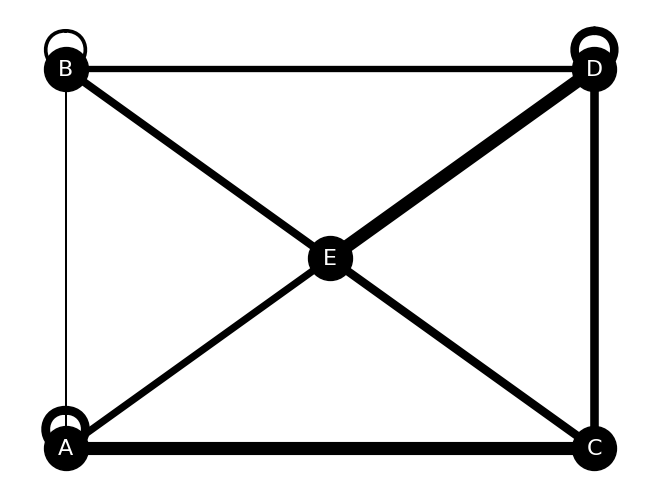

In [28]:
# 重み情報を読み込み、重み付けを実施(サンプル)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# データ読み込み
df_w = pd.read_csv("network_weight.csv")
df_p = pd.read_csv("network_pos.csv")
print(df_w)
print(df_p)

# エッジの重みのリスト化
size = 10
edge_weights = []
for i in range(len(df_w)):
  for j in range(len(df_w.columns)):
    edge_weights.append(df_w.iloc[i][j] * size)
print(edge_weights)

# グラフオブジェクトの作成
G = nx.Graph()

# 頂点の設定
for i in range(len(df_w.columns)):
  G.add_node(df_w.columns[i])

# 辺の設定
for i in range(len(df_w.columns)):
  for j in range(len(df_w.columns)):
    G.add_edge(df_w.columns[i], df_w.columns[j])

# 座標の設定
pos = {}
for i in range(len(df_w.columns)):
  node = df_w.columns[i]
  pos[node] = (df_p[node][0], df_p[node][1])
print(pos)

# 描画
nx.draw(G, pos, with_labels=True, font_size=16, node_size=1000, node_color="k", font_color="w", width=edge_weights)

# 表示
plt.show()

## ノック56: 輸送ルート情報を読み込む

In [29]:
# データ読み込み
df_tr = pd.read_csv("trans_route.csv", index_col = "工場")
df_tr.head()

,F1,F2,F3,F4
工場,,,,
W1,15,15,0,5
W2,5,0,30,5
W3,10,15,2,15


## ノック57: 輸送ルート情報を読み込む

    F1  F2  F3  F4
工場                
W1  15  15   0   5
W2   5   0  30   5
W3  10  15   2  15
   W1  W2  W3   F1   F2   F3   F4
0   0   0   0  4.0  4.0  4.0  4.0
1   1   2   3  0.5  1.5  2.5  3.5
[0, 0, 1.5, 1.5, 0, 0.5, 0, 0.5, 0, 3.0, 0.5, 1.0, 1.5, 0.2, 1.5, 0, 0, 0, 0, 0, 0]
{'W1': (0, 1), 'W2': (0, 2), 'W3': (0, 3), 'F1': (4.0, 0.5), 'F2': (4.0, 1.5), 'F3': (4.0, 2.5), 'F4': (4.0, 3.5)}


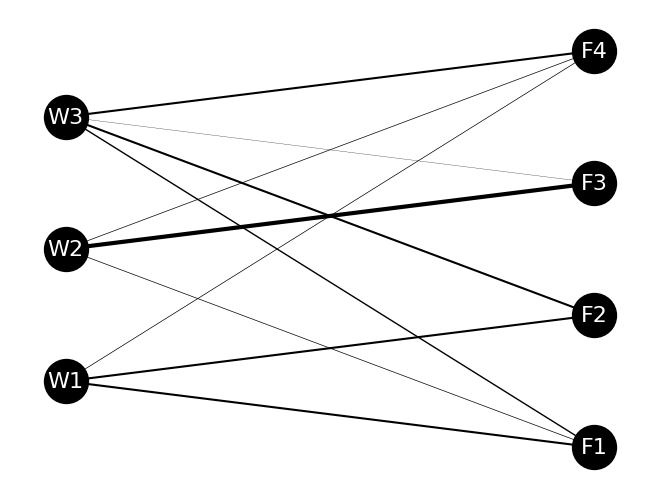

In [30]:
# 先程読み込んだデータを可視化する
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# データ読み込み
df_tr = pd.read_csv("trans_route.csv", index_col = "工場")
df_pos = pd.read_csv("trans_route_pos.csv")
print(df_tr)
print(df_pos)

# グラフオブジェクトの作成
G = nx.Graph()

# 頂点の設定
for i in range(len(df_pos.columns)):
  G.add_node(df_pos.columns[i])


# 辺の設定及びエッジの重みのリスト化
num_pre = 0
edge_weights = []
size = 0.1
for i in range(len(df_pos.columns)):
  for j in range(len(df_pos.columns)):
    if not (i==j):
      # 辺の追加
      G.add_edge(df_pos.columns[i], df_pos.columns[j])
      # エッジの重みの追加
      if num_pre < len(G.edges):
        num_pre = len(G.edges)
        weight = 0
        if (df_pos.columns[i] in df_tr.columns)and(df_pos.columns[j] in df_tr.index):
          if df_tr[df_pos.columns[i]][df_pos.columns[j]]:
            weight = df_tr[df_pos.columns[i]][df_pos.columns[j]] * size

        elif (df_pos.columns[j] in df_tr.columns)and(df_pos.columns[i] in df_tr.index):
          if df_tr[df_pos.columns[j]][df_pos.columns[i]]:
            weight = df_tr[df_pos.columns[j]][df_pos.columns[i]] * size
        edge_weights.append(weight)
print(edge_weights)

# 座標の設定
pos = {}
for i in range(len(df_pos.columns)):
  node = df_pos.columns[i]
  pos[node] = (df_pos[node][0], df_pos[node][1])
print(pos)

# 描画
nx.draw(G, pos, with_labels=True, font_size=16, node_size=1000, node_color="k", font_color="w", width=edge_weights)

# 表示
plt.show()

## ノック58: 輸送コスト関数を作成

In [31]:
# 輸送ルート最適化のため、目的関数である輸送コストの計算関数を作成する

# データ読み込み
df_tr = pd.read_csv("trans_route.csv", index_col = "工場")
df_tc = pd.read_csv("trans_cost.csv", index_col = "工場")
print(df_tr)
print(df_tc)

# 輸送コスト関数
def trans_cost(df_tr, df_tc):
  cost = 0
  for i in range(len(df_tc.index)):
    for j in range(len(df_tr.columns)):
      cost += df_tr.iloc[i][j] * df_tc.iloc[i][j]  # 代入演算子+= を使用
  return cost

print("総輸送コスト：" +str(trans_cost(df_tr, df_tc)))

    F1  F2  F3  F4
工場                
W1  15  15   0   5
W2   5   0  30   5
W3  10  15   2  15
    F1  F2  F3  F4
工場                
W1  10  10  11  27
W2  18  21  12  14
W3  15  12  14  12
総輸送コスト：1493


## ノック59: 制約条件を設ける

In [32]:
# データ読み込み
df_tf = pd.read_csv("trans_route.csv", index_col="工場")
df_demand = pd.read_csv("demand.csv")
df_supply = pd.read_csv("supply.csv")
print(df_tf)
print(df_demand)
print(df_supply)


# 需要側の制約条件
for i in range(len(df_demand.columns)):
  temp_sum = sum(df_tr[df_demand.columns[i]])
  print(str(df_demand.columns[i])+"への輸送量:"+str(temp_sum)+"(需要量:"+str(df_demand.iloc[0][i])+")")
  if temp_sum >= df_demand.iloc[0][i]:
    print("需要量を満たしています。")
  else:
    print("需要量を満たしていません。輸送ルートの再計算が必要。")

# 供給側の制約条件
for i in range(len(df_supply.columns)):
  temp_sum = sum(df_tr.loc[df_supply.columns[i]])
  print(str(df_supply.columns[i])+"からの輸送量:"+str(temp_sum)+"(供給限界:"+str(df_supply.iloc[0][i])+")")
  if temp_sum <= df_supply.iloc[0][i]:
    print("供給限界の範囲内です。")
  else:
    print("供給限界を超過しています。輸送ルートの再計算が必要。")

    F1  F2  F3  F4
工場                
W1  15  15   0   5
W2   5   0  30   5
W3  10  15   2  15
   F1  F2  F3  F4
0  28  29  31  25
   W1  W2  W3
0  35  41  42
F1への輸送量:30(需要量:28)
需要量を満たしています。
F2への輸送量:30(需要量:29)
需要量を満たしています。
F3への輸送量:32(需要量:31)
需要量を満たしています。
F4への輸送量:25(需要量:25)
需要量を満たしています。
W1からの輸送量:35(供給限界:35)
供給限界の範囲内です。
W2からの輸送量:40(供給限界:41)
供給限界の範囲内です。
W3からの輸送量:42(供給限界:42)
供給限界の範囲内です。


## ノック60: 輸送ルートを変更して、輸送コスト関数の変化を確認する

In [33]:
# 試しに作った輸送ルートtrans_rounte_new.csv のデータがどの程度コスト改善するか確認する
import pandas as pd
import numpy as np

# データ読み込み
df_tr_new = pd.read_csv("trans_route_new.csv", index_col="工場")
print(df_tr_new)

# 総輸送コスト再計算
print("総輸送コスト(変更後):"+str(trans_cost(df_tr_new, df_tc)))

# 制約条件計算関数を定義
# 需要側
def condition_demand(df_tr, df_demand):
  flag = np.zeros(len(df_demand.columns))
  for i in range(len(df_demand.columns)):
    temp_sum = sum(df_tf[df_demand.columns[i]])
    if (temp_sum >= df_demand.iloc[0][i]):
      flag[i] = 1  # 条件を満たしている場合は1を記入
  return flag

# 供給側
def condition_supply(df_tr, df_supply):
  flag = np.zeros(len(df_supply.columns))
  for i in range(len(df_supply.columns)):
    temp_sum = sum(df_tr.loc[df_supply.columns[i]])
    if temp_sum <= df_supply.iloc[0][i]:
      flag[i] = 1  # 条件を満たしている場合は1を記入
  return flag

print("需要条件計算結果:"+str(condition_demand(df_tr_new,df_demand)))
print("供給条件計算結果:"+str(condition_supply(df_tr_new,df_supply)))

    F1  F2  F3  F4
工場                
W1  15  15   0   0
W2   5   0  30  10
W3  10  15   2  15
総輸送コスト(変更後):1428
需要条件計算結果:[1. 1. 1. 1.]
供給条件計算結果:[1. 0. 1.]
